In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import (train_test_split,
                                    cross_val_score)

In [2]:
data = load_digits(return_X_y=True)

images = data[0]
target = data[1]

data = pd.DataFrame(images)
data['target'] = target

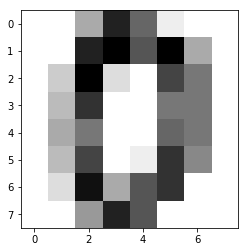

In [3]:
first_image = images[0].reshape(8,8)
plt.imshow(first_image, cmap='gray_r')

In [4]:
target = 'target'
features = [col for col in data.columns if col != target]
X_train, X_test, y_train, y_test = train_test_split(data[features], data[[target]], test_size=0.8, random_state=1)

In [98]:
class NeuralNetwork:
    def __init__(self, hidden_layer_sizes, random_state=None):
        np.random.seed(random_state)
        self.hidden_layer_sizes = hidden_layer_sizes
        
    def fit(self, X, y):
        self.X = X
        self.y = pd.Series(y)
        self.weights = []
        self.biases = []
        for idx in range(len(self.hidden_layer_sizes) + 1):
            neurons = self.hidden_layer_sizes[idx] if idx < len(self.hidden_layer_sizes) else len(self.y.unique())
            previous_neurons = self.X.shape[1] if idx == 0 else self.hidden_layer_sizes[idx-1]
            self.weights.append(np.random.rand(neurons, previous_neurons))
            self.biases.append(np.random.rand(1, neurons)[0])
        self.output = np.zeros(len(self.y))
    
    def feed_forward(self, x):
        x = np.array(x)
        assert len(x.shape) >= 2
        output = []
        for row in x:
            feed_forward_vector = None
            for idx in range(len(self.weights)):
                weight_layer = self.weights[idx]
                bias_layer = self.biases[idx]
                neurons = row if feed_forward_vector is None else feed_forward_vector
                feed_forward_vector = weight_layer.dot(neurons) + bias_layer
            output.append(feed_forward_vector)
        return output
    
    def backpropegation(self):
        
        
nn = NeuralNetwork(hidden_layer_sizes=(4,), random_state=1)
nn.fit(X_train, y_train.values.ravel())
print(y_train[:2])
nn.feed_forward(X_train[:2])

      target
410        4
1654       2


[array([484.68881588, 353.96172485, 238.90482124, 422.68472195,
        285.71733372, 425.71021585, 396.84256504, 413.41941875,
        224.19971567, 247.5704537 ]),
 array([534.00535376, 388.38416665, 263.54974526, 474.94986917,
        318.86559077, 463.01449374, 441.71826671, 454.7424958 ,
        241.604782  , 286.7681014 ])]